In [14]:
# titanic Data Load & Create DataFrame

import pandas as pd

titanic = pd.read_csv('./csv/titanic_train.csv')
titanic_df = pd.DataFrame(titanic)
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
# PassengerId, Name, SibSp, Parch, Fare, Ticket, Cabin Drop

titanic_df = titanic_df.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Fare', 'Ticket', 'Cabin'])

In [21]:
# 결측치 채우기
# Age -> 평균, Embarked -> S로 통일

titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean().round(0))
titanic_df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S
...,...,...,...,...,...
886,0,2,male,27.0,S
887,1,1,female,19.0,S
888,0,3,female,30.0,S
889,1,1,male,26.0,C


In [36]:
X = titanic_df.drop(columns=['Survived'])
y = titanic_df.loc[:, 'Survived']

In [38]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X['Sex'] = encoder.fit_transform(X['Sex'])
X['Embarked'] = encoder.fit_transform(X['Embarked'])

In [45]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

scaler = MinMaxScaler()
X['Age'] = scaler.fit_transform(X[['Age']])

In [49]:
# 훈련용 데이터셋 : 시험용 데이터셋 = 8:2 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# sklearn.base BaseEstimator
* https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html?highlight=base#sklearn.base.BaseEstimator
* class sklearn.base.BaseEstimator

In [96]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)
print(f'Titanic Random Correct : {accuracy_score(y_test, pred):.4f}')
print(f'Titanic Random Precision : {precision_score(y_test, pred):.4f}')
print(f'Titanic Random Recall : {recall_score(y_test, pred):.4f}')

Titanic Random Correct : 0.8101
Titanic Random Precision : 0.7143
Titanic Random Recall : 0.7377


In [74]:
print(f'Titanic F1-Score : {f1_score(y_test, pred):.4f}')

ps = precision_score(y_test, pred).round(4)
rs = recall_score(y_test, pred).round(4)

# 공식이 맞긴 맞구나?
print('Titanic F1-Score 공식 : ', (2*ps*rs/(ps+rs)).round(4))

Titanic F1-Score : 0.7317
Titanic F1-Score 공식 :  0.7317


In [101]:
# sklearn -> logisticRegression

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

print('pred_proba Shape :', pred_proba.shape)
print('pred_proba Result\n', pred_proba[:3])

pred_proba Shape : (179, 2)
pred_proba Result
 [[0.47106422 0.52893578]
 [0.89728699 0.10271301]
 [0.88461899 0.11538101]]


In [90]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print(pred_proba_result[:3])

[[0.47106422 0.52893578 1.        ]
 [0.89728699 0.10271301 0.        ]
 [0.88461899 0.11538101 0.        ]]


In [100]:
from sklearn.preprocessing import Binarizer

custom_threshold=0.5
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print(binarizer)
print(f'Titanic Random Correct : {accuracy_score(y_test, custom_predict):.4f}')
print(f'Titanic Random Precision : {precision_score(y_test, custom_predict):.4f}')
print(f'Titanic Random Recall : {recall_score(y_test, custom_predict):.4f}')

Binarizer(threshold=0.5)
Titanic Random Correct : 0.8492
Titanic Random Precision : 0.7833
Titanic Random Recall : 0.7705


In [107]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, custom_predict)
print(confusion)

confusion_2 = confusion_matrix(y_test, pred)
confusion_2

ts = accuracy_score(y_test, custom_predict).round(4)
ps = precision_score(y_test, custom_predict).round(4)
rs = recall_score(y_test, custom_predict).round(4)

[[105  13]
 [ 14  47]]


임계값 배열:  (119,)
Precision 배열:  (120,)
Recall 배열:  (120,)
[0.05971939 0.06462376 0.06990096 0.07958834 0.08166762]
[0.34078212 0.34269663 0.34463277 0.34857143 0.35057471]
[1. 1. 1. 1. 1.]


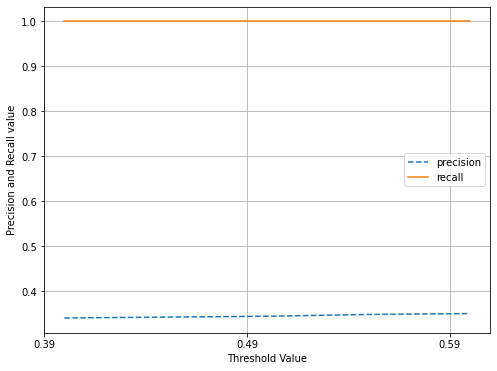

In [144]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
ts = thresholds

pred_proba_class1 = pred_proba[:, 1]

ps, rs, ts = precision_recall_curve(y_test, pred_proba_class1)

print("임계값 배열: ", np.shape(ts))
print("Precision 배열: ", ps.shape)
print("Recall 배열: ", rs.shape)

print(ts[:5])
print(ps[:5])
print(rs[:5])

def precision_recall_curve_plot(y_test, pred_proba_1):
    ps, rs, ts = precision_recall_curve(y_test, pred_proba_1)

    plt.figure(figsize=(8,6))
    threshold_boundary = np.shape(thresholds)[0]
    plt.plot(thresholds, ps[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, rs[0:threshold_boundary], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot( y_test, pred_proba_class1.reshape(-1,1) )